In [1]:
import os
os.chdir('../../')
!ls

environment.yml food_trade


In [2]:
import pandas as pd
import numpy as np
import glob
from functools import reduce
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, matthews_corrcoef, r2_score, precision_score, recall_score

from food_trade.flow_prediction.helper_functions import *
from food_trade.flow_prediction.run_harmonizing import *

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
sns.set()
%config InlineBackend.figure_format = 'retina'

### read datasets, get totals, consumption

In [3]:
master_df_country = country_totals()

Wheat
production: 759821262.092
trade: 192360507.32999998
supply: 184782343.10737538
corr: 0.9954266084631147
corr log: 0.8594785725870363
r2: 0.9903702979262548
r2 log: 0.6687206113738968
Maize (corn)
production: 1153224941.412
trade: 183337114.91199997
supply: 177425474.78741455
corr: 0.9989786225630489
corr log: 0.8908921755643929
r2: 0.9978116939119885
r2 log: 0.7646921566530809
Rye
production: 12932937.704
trade: 1633400.406
supply: 1494443.3102729595
corr: 0.997390227006929
corr log: 0.8909471696904983
r2: 0.9894054863151779
r2 log: 0.7632970210873024
Barley
production: 150059533.916
trade: 37852705.832
supply: 36457827.035476394
corr: 0.9969851390530963
corr log: 0.886436893454628
r2: 0.993763583073297
r2 log: 0.7434622292410147
Oats
production: 23818690.536
trade: 4449255.546
supply: 4063872.610176231
corr: 0.9990866117546189
corr log: 0.8370316992154471
r2: 0.9976358587654882
r2 log: 0.6571959866217372
Sorghum
production: 59090591.276
trade: 7228122.155999999
supply: 7148470.9

In [4]:
df_country, df_admin = get_bilateral_data()

In [5]:
master_df_admin = pred_consumption(master_df_country, df_country, df_admin)

wheat
R2 while fitting
R2: 0.8930574650138782
R2 on logs: 0.5216519843365922
R2 between country level consumption and totalled predicted admin level consumption
R2: 0.9263086053985726
R2 on logs: 0.4675701593284588
maize
R2 while fitting
R2: 0.630045556994343
R2 on logs: 0.7384525602690919
R2 between country level consumption and totalled predicted admin level consumption
R2: 0.6890248173612055
R2 on logs: 0.7155601117581345
rice
R2 while fitting
R2: 0.8495977366088282
R2 on logs: 0.7622026827779412
R2 between country level consumption and totalled predicted admin level consumption
R2: 0.9409644775953583
R2 on logs: 0.6846583842863454
other_cereals
R2 while fitting
R2: 0.5744868918846386
R2 on logs: 0.7493133508368679
R2 between country level consumption and totalled predicted admin level consumption
R2: 0.5222545742764972
R2 on logs: 0.6512881416606083
cereals_all
R2 while fitting
R2: 0.897171597389439
R2 on logs: 0.8748160136043082
R2 between country level consumption and totalled pr

In [5]:
df_india, df_us_china, df_us_state_int = read_other_data()

### ml performance results

In [3]:
class_all = pd.concat([pd.read_csv(f) for f in glob.glob(
    '../../data/machine_learning/model_performance/classification_models*all.csv')], axis=0, ignore_index=True)
reg_all = pd.concat([pd.read_csv(f) for f in glob.glob(
    '../../data/machine_learning/model_performance/regression_models*all.csv')], axis=0, ignore_index=True)
class_fao = pd.concat([pd.read_csv(f) for f in glob.glob(
    '../../data/machine_learning/model_performance/classification_models*fao.csv')], axis=0, ignore_index=True)
reg_fao = pd.concat([pd.read_csv(f) for f in glob.glob(
    '../../data/machine_learning/model_performance/regression_models*fao.csv')], axis=0, ignore_index=True)

In [4]:
def choose_model(g, metric='mcc'):
    df = g.copy()
    df  = df[df['dataset']=='overall']
    mod = df[df[metric]==df[metric].max()]['model'].values[0]
    return g[g['model']==mod]
    
class_all = class_all.groupby(['crop', 'model', 'dataset', 'split']).mean().reset_index().drop('iteration', axis=1)
class_all = class_all[class_all['split']=='test']
class_all_best = class_all.groupby('crop').apply(choose_model, metric='mcc').reset_index(drop=True)

reg_all = reg_all.groupby(['crop', 'model', 'dataset', 'split']).mean().reset_index().drop('iteration', axis=1)
reg_all = reg_all[reg_all['split']=='test']
reg_all_best = reg_all.groupby('crop').apply(choose_model, metric='r2').reset_index(drop=True)

class_fao = class_fao.groupby(['crop', 'model', 'dataset', 'split']).mean().reset_index().drop('iteration', axis=1)
class_fao = class_fao[class_fao['split']=='test']
class_fao_best = class_fao.groupby('crop').apply(choose_model, metric='mcc').reset_index(drop=True)

reg_fao = reg_fao.groupby(['crop', 'model', 'dataset', 'split']).mean().reset_index().drop('iteration', axis=1)
reg_fao = reg_fao[reg_fao['split']=='test']
reg_fao_best = reg_fao.groupby('crop').apply(choose_model, metric='r2').reset_index(drop=True)

In [6]:
class_all[class_all['crop']=='cereals_all'].sort_values('model')

,crop,model,dataset,split,accuracy,precision,recall,mcc
0,cereals_all,dl,faostat,test,0.925665,0.856064,0.867364,0.810933
2,cereals_all,dl,harris et al 2020,test,0.870383,0.878130,0.921054,0.726900
4,cereals_all,dl,overall,test,0.925850,0.859046,0.870661,0.813821
6,cereals_all,dl,pandit et al 2023,test,0.949095,0.888602,0.864503,0.843949
8,cereals_all,hist,faostat,test,0.936223,0.847802,0.926420,0.842901
10,cereals_all,hist,harris et al 2020,test,0.895542,0.875610,0.970183,0.777579
12,cereals_all,hist,overall,test,0.937869,0.853882,0.930254,0.848704
14,cereals_all,hist,pandit et al 2023,test,0.973708,0.928620,0.946278,0.920713
16,cereals_all,logistic,faostat,test,0.893491,0.819241,0.768954,0.722319
18,cereals_all,logistic,harris et al 2020,test,0.715487,0.743930,0.826937,0.378534


In [7]:
class_all[(class_all['crop']=='cereals_all') & (class_all['dataset']=='overall')]

,crop,model,dataset,split,accuracy,precision,recall,mcc
4,cereals_all,dl,overall,test,0.925850,0.859046,0.870661,0.813821
12,cereals_all,hist,overall,test,0.937869,0.853882,0.930254,0.848704
20,cereals_all,logistic,overall,test,0.881498,0.802252,0.747360,0.694484
28,cereals_all,rf,overall,test,0.930449,0.841845,0.915675,0.830241


In [8]:
class_all_best

,crop,model,dataset,split,accuracy,precision,recall,mcc
0,cereals_all,hist,faostat,test,0.936223,0.847802,0.926420,0.842901
1,cereals_all,hist,harris et al 2020,test,0.895542,0.875610,0.970183,0.777579
2,cereals_all,hist,overall,test,0.937869,0.853882,0.930254,0.848704
3,cereals_all,hist,pandit et al 2023,test,0.973708,0.928620,0.946278,0.920713
4,maize,rf,faostat,test,0.947381,0.729338,0.850905,0.758565
5,maize,rf,harris et al 2020,test,0.965210,0.000000,0.000000,-0.010441
6,maize,rf,overall,test,0.947950,0.728607,0.843615,0.755126
7,other_cereals,rf,faostat,test,0.939072,0.717948,0.862569,0.752772
8,other_cereals,rf,harris et al 2020,test,0.944420,0.640952,0.275455,0.389384
9,other_cereals,rf,overall,test,0.939236,0.717318,0.853385,0.748285


In [9]:
class_fao_best

,crop,model,dataset,split,accuracy,precision,recall,mcc
0,cereals_all,hist,overall,test,0.936215,0.846365,0.925700,0.841959
1,maize,rf,overall,test,0.948110,0.733851,0.849242,0.760571
2,other_cereals,rf,overall,test,0.940100,0.716836,0.871679,0.757058
3,rice,dl,overall,test,0.961195,0.836820,0.853822,0.823057
4,wheat,hist,overall,test,0.960560,0.773317,0.950496,0.836170


In [11]:
reg_all[reg_all['crop']=='cereals_all'].sort_values('model')

,crop,model,dataset,split,rmse,r2,r2_log,obs_corr_wheat,obs_corr_rice,obs_corr_maize,obs_corr_other,pred_corr_wheat,pred_corr_rice,pred_corr_maize,pred_corr_other
0,cereals_all,dl,faostat,test,253672.481637,0.520134,0.653613,0.713735,0.202170,0.819060,0.573719,0.589438,0.112370,0.572904,0.524060
2,cereals_all,dl,harris et al 2020,test,381901.922648,0.345412,0.746439,0.844110,0.749585,0.073493,0.232818,0.564000,0.472561,0.160219,0.215681
4,cereals_all,dl,overall,test,259285.922656,0.522306,0.681949,0.744195,0.310495,0.761186,0.537139,0.558042,0.146396,0.556706,0.511155
6,cereals_all,dl,pandit et al 2023,test,28127.204284,0.542966,0.875652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,cereals_all,hist,faostat,test,286734.443048,0.390739,0.703284,0.713735,0.202170,0.819060,0.573719,0.527514,0.132742,0.500108,0.386097
10,cereals_all,hist,harris et al 2020,test,322813.772416,0.520780,0.834608,0.844110,0.749585,0.073493,0.232818,0.636369,0.557135,0.090152,0.269966
12,cereals_all,hist,overall,test,283808.752855,0.424744,0.733766,0.744195,0.310495,0.761186,0.537139,0.570373,0.247597,0.456987,0.362630
14,cereals_all,hist,pandit et al 2023,test,18509.807202,0.786240,0.946722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,cereals_all,linear,faostat,test,377485.858106,0.020314,0.472424,0.713735,0.202170,0.819060,0.573719,0.412583,0.141892,0.336114,0.352330
18,cereals_all,linear,harris et al 2020,test,475594.048135,0.047044,0.456297,0.844110,0.749585,0.073493,0.232818,0.327286,0.193495,0.077869,0.182669


In [12]:
reg_all[(reg_all['crop']=='cereals_all') & (reg_all['dataset']=='overall')]

,crop,model,dataset,split,rmse,r2,r2_log,obs_corr_wheat,obs_corr_rice,obs_corr_maize,obs_corr_other,pred_corr_wheat,pred_corr_rice,pred_corr_maize,pred_corr_other
4,cereals_all,dl,overall,test,259285.922656,0.522306,0.681949,0.744195,0.310495,0.761186,0.537139,0.558042,0.146396,0.556706,0.511155
12,cereals_all,hist,overall,test,283808.752855,0.424744,0.733766,0.744195,0.310495,0.761186,0.537139,0.570373,0.247597,0.456987,0.362630
20,cereals_all,linear,overall,test,378792.193754,0.027666,0.482809,0.744195,0.310495,0.761186,0.537139,0.307016,0.193779,0.172863,0.205478
28,cereals_all,rf,overall,test,364134.654711,0.105083,0.668126,0.744195,0.310495,0.761186,0.537139,0.584376,0.281126,0.320353,0.284887


In [13]:
reg_all_best

,crop,model,dataset,split,rmse,r2,r2_log,obs_corr_wheat,obs_corr_rice,obs_corr_maize,obs_corr_other,pred_corr_wheat,pred_corr_rice,pred_corr_maize,pred_corr_other
0,cereals_all,dl,faostat,test,253672.481637,0.520134,0.653613,0.713735,0.202170,0.819060,0.573719,0.589438,0.112370,0.572904,0.524060
1,cereals_all,dl,harris et al 2020,test,381901.922648,0.345412,0.746439,0.844110,0.749585,0.073493,0.232818,0.564000,0.472561,0.160219,0.215681
2,cereals_all,dl,overall,test,259285.922656,0.522306,0.681949,0.744195,0.310495,0.761186,0.537139,0.558042,0.146396,0.556706,0.511155
3,cereals_all,dl,pandit et al 2023,test,28127.204284,0.542966,0.875652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,maize,dl,faostat,test,340035.299799,0.268500,0.591448,0.303562,0.126880,1.000000,0.268876,0.294178,0.069214,0.573746,0.192602
5,maize,dl,harris et al 2020,test,229917.646962,-0.020129,-0.472305,-0.214891,-0.218461,1.000000,-0.222404,-0.317673,-0.195859,0.235396,-0.325712
6,maize,dl,overall,test,339361.078956,0.268233,0.597179,0.302542,0.123487,1.000000,0.268277,0.292648,0.066981,0.573048,0.191727
7,other_cereals,dl,faostat,test,103263.408712,0.270483,0.604595,0.363681,0.006186,0.255402,1.000000,0.445564,0.047247,0.224990,0.645768
8,other_cereals,dl,harris et al 2020,test,196695.176197,-0.113907,-0.068048,0.637719,0.310015,-0.102550,1.000000,0.414340,0.339388,-0.156592,0.454238
9,other_cereals,dl,overall,test,106129.599635,0.260908,0.602584,0.363498,0.029924,0.241857,1.000000,0.442969,0.064342,0.218631,0.631374


In [14]:
reg_all = pd.concat([pd.read_csv(f) for f in glob.glob(
    '../../data/machine_learning/model_performance/regression_models*all.csv')], axis=0, ignore_index=True)
reg_all = reg_all.groupby(['crop', 'model', 'dataset', 'split']).mean().reset_index().drop('iteration', axis=1)
reg_all[(reg_all['split']=='train') & (reg_all['crop']=='cereals_all') & (reg_all['model']=='dl')]

,crop,model,dataset,split,rmse,r2,r2_log,obs_corr_wheat,obs_corr_rice,obs_corr_maize,obs_corr_other,pred_corr_wheat,pred_corr_rice,pred_corr_maize,pred_corr_other
1,cereals_all,dl,faostat,train,163098.481020,0.820554,0.950513,0.703979,0.219720,0.865691,0.477781,0.712620,0.202265,0.744422,0.491501
3,cereals_all,dl,harris et al 2020,train,233596.638843,0.625247,0.911313,0.890535,0.657406,0.112396,0.242866,0.749279,0.484504,0.048067,0.253585
5,cereals_all,dl,overall,train,164186.334997,0.807843,0.950668,0.715090,0.271865,0.834233,0.463924,0.700067,0.218043,0.722679,0.479115
7,cereals_all,dl,pandit et al 2023,train,19763.533646,0.758648,0.969615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
reg_fao_best

,crop,model,dataset,split,rmse,r2,r2_log,obs_corr_wheat,obs_corr_rice,obs_corr_maize,obs_corr_other,pred_corr_wheat,pred_corr_rice,pred_corr_maize,pred_corr_other
0,cereals_all,hist,overall,test,240370.586160,0.478757,0.705976,0.751501,0.161653,0.745650,0.586300,0.503202,0.088084,0.583835,0.434942
1,maize,dl,overall,test,337211.252675,0.333437,0.602026,0.287622,0.158794,1.000000,0.283417,0.325855,0.126091,0.648643,0.141500
2,other_cereals,hist,overall,test,88806.023438,0.212443,0.639975,0.357832,0.003890,0.153421,1.000000,0.405556,0.002571,0.105069,0.559483
3,rice,dl,overall,test,50176.435942,0.362440,0.618278,0.078666,1.000000,0.129098,0.014161,0.060000,0.648745,0.095542,0.009676
4,wheat,dl,overall,test,164645.175297,0.272517,0.624882,1.000000,0.100990,0.316107,0.353470,0.672387,0.093425,0.328615,0.451329


### validation of harmonized flows

In [15]:
# all ids
df_ids = df_admin[['from_id', 'from_iso3']].drop_duplicates().sort_values(by='from_id').reset_index(drop=True)
df_ids = df_ids.rename(columns={'from_id': 'id', 'from_iso3': 'iso3'})
crop = 'cereals_all'
suffix = 'all'
threshold = 0.5

In [16]:
df_mat = pd.read_parquet(f'../../data/machine_learning/admin_predictions/df_mat_{crop}_{suffix}.parquet.gzip')
df_mat = df_mat.groupby(['from_iso3', 'to_iso3']).apply(lambda g: probs_edit(g)).reset_index(drop=True) # using the defaults to edit probs
df_mat = df_mat.sort_values(by=['from_id', 'to_id'])

/var/folders/w4/vjtm9mrs2411x50mjmg78b7r0000gn/T/ipykernel_79637/4005787185.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_mat = df_mat.groupby(['from_iso3', 'to_iso3']).apply(lambda g: probs_edit(g)).reset_index(drop=True) # using the defaults to edit probs


In [17]:
df_F = pd.read_parquet(f'../../data/machine_learning/admin_predictions_harmonized/df_mat_bal_{crop}_{suffix}.parquet.gzip')
df_F = df_F.merge(df_mat)
df_F.loc[df_F[f'supply_{crop}_exists_pred']<=threshold, f'supply_{crop}_pred'] = 0
df_F[[f'supply_{crop}_bal', f'supply_{crop}_pred']].corr().values[0,1]

0.4757844921655185

In [18]:
print(r2_score(df_F[f'supply_{crop}_pred'], df_F[f'supply_{crop}_bal']))
print(r2_score(np.log(df_F[f'supply_{crop}_pred']+1), np.log(df_F[f'supply_{crop}_bal']+1)))

0.2053860114483782
0.40503091007012004


<Axes: xlabel='supply_cereals_all_bal', ylabel='correlation'>

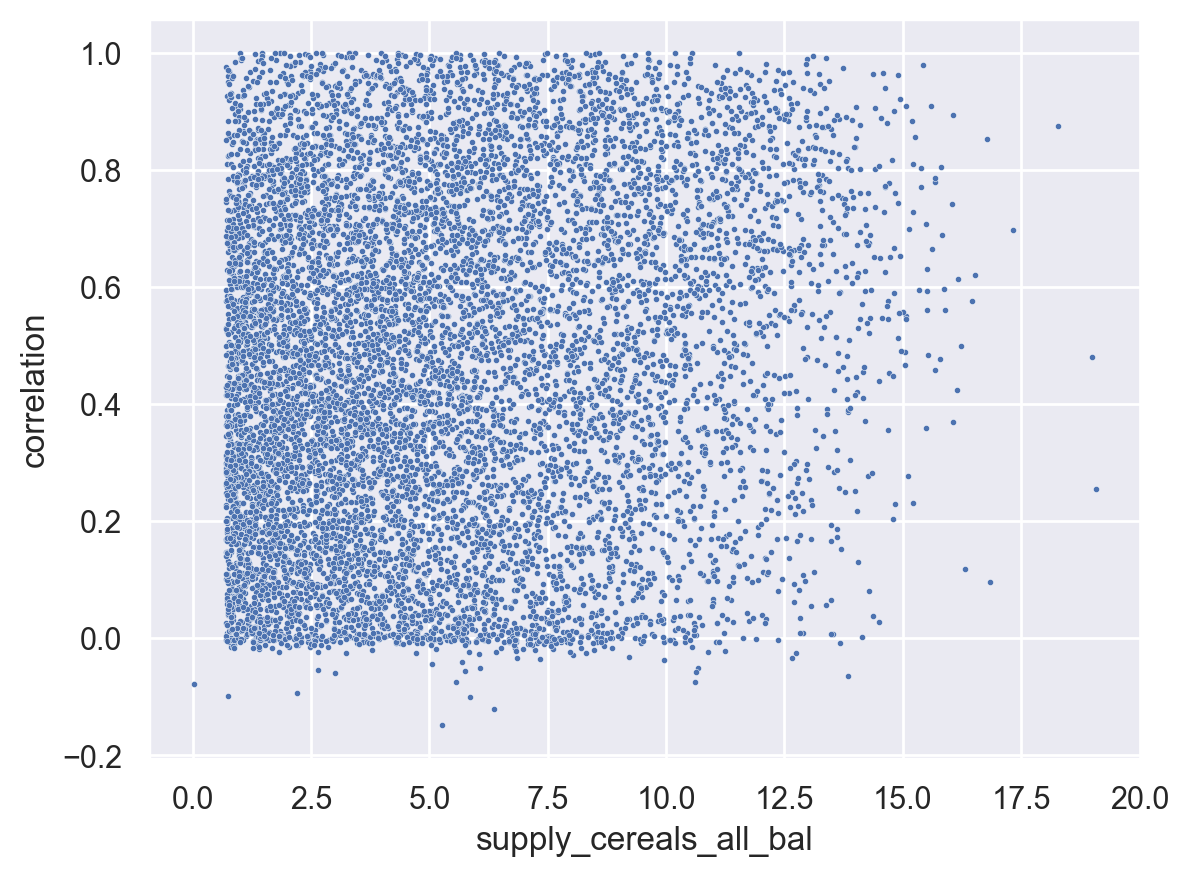

In [19]:
df = df_F.groupby(['from_iso3', 'to_iso3'])[[
    f'supply_{crop}_bal', f'supply_{crop}_pred']].corr().iloc[0::2][[f'supply_{crop}_pred']].reset_index().drop('level_2', axis=1).rename(
    columns={f'supply_{crop}_pred': 'correlation'})
df = df.merge(df_F.groupby(['from_iso3', 'to_iso3']).sum()[[f'supply_{crop}_bal']].reset_index())

sns.scatterplot(x=np.log(df[f'supply_{crop}_bal']+1), y=df['correlation'], s=5)

<Axes: >

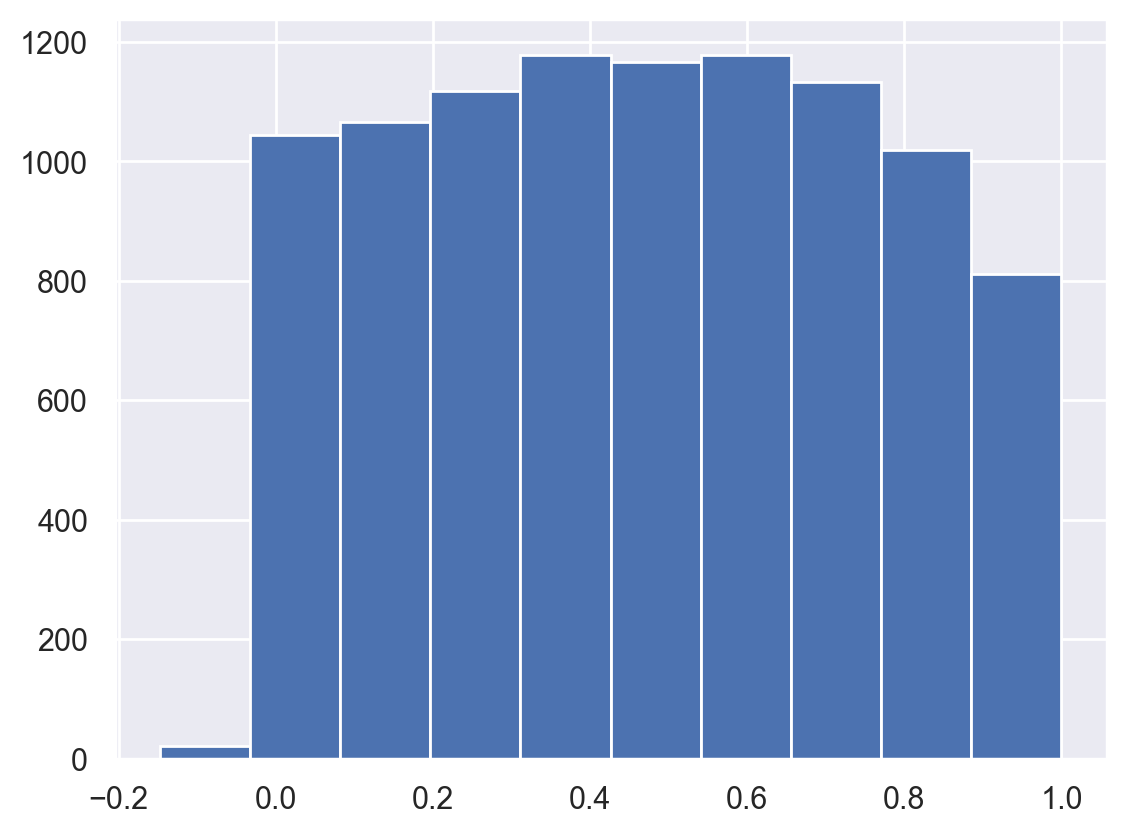

In [20]:
df['correlation'].hist(bins=10)

In [21]:
d = df_F[(df_F['from_iso3']=='IND') & (df_F['to_iso3']=='IND')]
d.loc[d['from_id']=='IND.32_1', 'from_ID'] = 'IND.2_1'
d.loc[d['to_id']=='IND.32_1', 'to_ID'] = 'IND.2_1'
d = d[d['from_id']!=d['to_id']]
d = d.merge(df_india[['from_id', 'to_id', f'supply_{crop}']])

print(accuracy_score(d[f'supply_{crop}_bal']>0, d[f'supply_{crop}']>0))
print(precision_score(d[f'supply_{crop}_bal']>0, d[f'supply_{crop}']>0))
print(recall_score(d[f'supply_{crop}_bal']>0, d[f'supply_{crop}']>0))

print(d[f'supply_{crop}_bal'].corr(d[f'supply_{crop}']))
print(r2_score(d[f'supply_{crop}'], d[f'supply_{crop}_bal']))
print(r2_score(np.log(d[f'supply_{crop}']+1), np.log(d[f'supply_{crop}_bal']+1)))

0.8361344537815126
0.8117489986648865
0.918429003021148
0.7278554228549405
0.5203091784512471
0.517483389163572


/var/folders/w4/vjtm9mrs2411x50mjmg78b7r0000gn/T/ipykernel_79637/4249862077.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.loc[d['from_id']=='IND.32_1', 'from_ID'] = 'IND.2_1'
/var/folders/w4/vjtm9mrs2411x50mjmg78b7r0000gn/T/ipykernel_79637/4249862077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.loc[d['to_id']=='IND.32_1', 'to_ID'] = 'IND.2_1'


In [22]:
d.groupby(['from_iso3', 'to_iso3'])[[f'supply_{crop}', f'supply_{crop}_bal']].sum()

,,supply_cereals_all,supply_cereals_all_bal
from_iso3,to_iso3,,
IND,IND,8.012961e+07,8.171880e+07


In [23]:
d1 = df_F[(df_F['from_iso3']=='USA') & (df_F['to_iso3']=='CHN')]
d2 = df_F[(df_F['from_iso3']=='CHN') & (df_F['to_iso3']=='USA')]

d1 = d1.merge(df_us_china[['from_id', 'to_id', f'supply_{crop}']])
d2 = d2.merge(df_us_china[['from_id', 'to_id', f'supply_{crop}']])
d = pd.concat([d1, d2], axis=0, ignore_index=False)

print(accuracy_score(d[f'supply_{crop}_bal']>0, d[f'supply_{crop}']>0))
print(precision_score(d[f'supply_{crop}_bal']>0, d[f'supply_{crop}']>0))
print(recall_score(d[f'supply_{crop}_bal']>0, d[f'supply_{crop}']>0))

print(d[f'supply_{crop}_bal'].corr(d[f'supply_{crop}']))
print(r2_score(d[f'supply_{crop}'], d[f'supply_{crop}_bal']))
print(r2_score(d[f'supply_{crop}']/d[f'supply_{crop}'].sum(), d[f'supply_{crop}_bal']/d[f'supply_{crop}_bal'].sum()))
print(r2_score(np.log(d[f'supply_{crop}']+1), np.log(d[f'supply_{crop}_bal']+1)))

0.8991144845034789
0.703076923076923
0.7838765008576329
0.5449668780392712
-0.8020021109438709
0.09988153122015475
0.4184798215618868


In [24]:
d.groupby(['from_iso3', 'to_iso3'])[[f'supply_{crop}', f'supply_{crop}_bal']].sum()

,,supply_cereals_all,supply_cereals_all_bal
from_iso3,to_iso3,,
CHN,USA,1.619777e+03,3.428311e+04
USA,CHN,6.953306e+06,1.115439e+07


In [25]:
df_F[f'supply_{crop}_bal'].sum()

1186009610.8187392

In [26]:
df_F[(df_F['from_iso3']==df_F['to_iso3'])][f'supply_{crop}_bal'].sum()

730632073.5332432

In [27]:
df_F[(df_F['from_iso3']!=df_F['to_iso3'])][f'supply_{crop}_bal'].sum()

455377537.2854957

In [28]:
df_F[(df_F['from_iso3']==df_F['to_iso3']) & (df_F['from_iso3']=='IND')][f'supply_{crop}_bal'].sum()

85936946.97664121

In [29]:
df_F[(df_F['from_iso3']==df_F['to_iso3']) & (df_F['from_iso3']=='CHN')][f'supply_{crop}_bal'].sum()

192089346.13810056

In [30]:
df_F[(df_F['from_iso3']==df_F['to_iso3']) & (df_F['from_iso3']=='USA')][f'supply_{crop}_bal'].sum()

179097917.09052116

In [31]:
df_F[(df_F['from_iso3']==df_F['to_iso3']) & (df_F['from_iso3']=='BRA')][f'supply_{crop}_bal'].sum()

33275229.416830733

In [32]:
df_F[(df_F['from_iso3']==df_F['to_iso3']) & (df_F['from_iso3']=='IDN')][f'supply_{crop}_bal'].sum()

12231967.79309298

In [33]:
master_df_admin = master_df_admin.merge(
    df_F.groupby('from_id')[[f'supply_{crop}_bal']].sum().reset_index().rename(columns={'from_id': 'ID',
                                                                                        f'supply_{crop}_bal': f'{crop}_outflows'})
).merge(
    df_F.groupby('to_id')[[f'supply_{crop}_bal']].sum().reset_index().rename(columns={'to_id': 'ID',
                                                                                      f'supply_{crop}_bal': f'{crop}_inflows'})
)     
master_df_admin[f'{crop}_cons_pred'] = master_df_admin[f'{crop}_prod'] + master_df_admin[f'{crop}_inflows']- master_df_admin[f'{crop}_outflows'] 
master_df_admin[f'{crop}_cons_diff'] = master_df_admin[f'{crop}_cons'] - master_df_admin[f'{crop}_cons_pred']

In [34]:
# consumed within region
master_df_admin[f'{crop}_prod'].sum() - master_df_admin[f'{crop}_outflows'].sum()

1568051602.4031348

In [35]:
# no negative consumption
master_df_admin[master_df_admin[f'{crop}_cons_pred']<0].shape

(0, 21)

In [36]:
# more than 5% deficit after harmonizing
master_df_admin[master_df_admin[f'{crop}_cons_diff'] / master_df_admin[f'{crop}_cons']>0.05].shape

(136, 21)

In [37]:
# outflows exceed production after harmonizing
master_df_admin[master_df_admin[f'{crop}_outflows']>master_df_admin[f'{crop}_prod']]

,iso3,ID,wheat_prod,wheat_cons,wheat_exp_max,maize_prod,maize_cons,maize_exp_max,rice_prod,rice_cons,rice_exp_max,other_cereals_prod,other_cereals_cons,other_cereals_exp_max,cereals_all_prod,cereals_all_cons,cereals_all_exp_max,cereals_all_outflows,cereals_all_inflows,cereals_all_cons_pred,cereals_all_cons_diff
1746,LTU,LTU.6_1,763694.074862,81687.673015,682006.401846,6279.423332,13327.419435,-7047.996103,0.0,2065.936609,-2065.936609,239716.173248,115657.785617,124058.387631,1.009690e+06,199085.581812,810604.089630,1.043061e+06,222632.743580,189261.775579,9823.806233
2842,SVN,SVN.9_1,28601.090156,8546.406199,20054.683956,73021.224602,20480.704562,52540.520039,0.0,1038.493727,-1038.493727,27514.394587,10696.831131,16817.563457,1.291367e+05,34807.066846,94329.642499,1.428934e+05,46916.632142,33159.899544,1647.167302


In [38]:
# # correct LTU.6_1 and SVN.9_1
# # LTU.6_1 - remove 33372 from int outflows, add those to international outflows from 1,3,5,7,8, in prop to cons_diff
# # SVN.9_1 - remove 13757 from int outflows, add those to international outflows from 3, 5, 11, in prop to cons_dff

# # LTU.6_1
# current_total = df_F[(df_F['from_id']=='LTU.6_1') & (df_F['to_iso3']!='LTU')]['cereal_flow'].sum() 
# diff = master_df_admin[master_df_admin['ID']=='LTU.6_1'][f'{crop}_outflows'].values[0] - master_df_admin[master_df_admin['ID']=='LTU.6_1'][f'{crop}_prod'].values[0]
# new_total = current_total - diff
# df_F.loc[(df_F['from_id']=='LTU.6_1') & (df_F['to_iso3']!='LTU'), 'cereal_flow'] = df_F[(df_F['from_id']=='LTU.6_1') & (df_F['to_iso3']!='LTU')]['cereal_flow'] * new_total / current_total

# # other LTU IDs
# IDs = master_df_admin[(master_df_admin['iso3']=='LTU') & (master_df_admin[f'{crop}_cons_diff']<0)]['ID'].unique()
# df = master_df_admin[master_df_admin['ID'].isin(IDs)]
# df[f'{crop}_cons_diff'] = df[f'{crop}_cons_diff'] / df[f'{crop}_cons_diff'].sum()

# for ID in IDs:
#     current_total = df_F[(df_F['from_id']==ID) & (df_F['to_iso3']!='LTU')]['cereal_flow'].sum() 
#     new_total = current_total + diff*df[df['ID']==ID][f'{crop}_cons_diff'].values[0]
#     df_F.loc[(df_F['from_id']==ID) & (df_F['to_iso3']!='LTU'), 'cereal_flow'] = df_F[(df_F['from_id']==ID) & (df_F['to_iso3']!='LTU')]['cereal_flow'] * new_total / current_total
    
    
# # SVN.9_1
# current_total = df_F[(df_F['from_id']=='SVN.9_1') & (df_F['to_iso3']!='SVN')]['cereal_flow'].sum() 
# diff = master_df_admin[master_df_admin['ID']=='SVN.9_1'][f'{crop}_outflows'].values[0] - master_df_admin[master_df_admin['ID']=='SVN.9_1'][f'{crop}_prod'].values[0]
# new_total = current_total - diff
# df_F.loc[(df_F['from_id']=='SVN.9_1') & (df_F['to_iso3']!='SVN'), 'cereal_flow'] = df_F[(df_F['from_id']=='SVN.9_1') & (df_F['to_iso3']!='SVN')]['cereal_flow'] * new_total / current_total

# # other SVN IDs
# IDs = master_df_admin[(master_df_admin['iso3']=='SVN') & (master_df_admin[f'{crop}_cons_diff']<0)]['ID'].unique()
# df = master_df_admin[master_df_admin['ID'].isin(IDs)]
# df[f'{crop}_cons_diff'] = df[f'{crop}_cons_diff'] / df[f'{crop}_cons_diff'].sum()

# for ID in IDs:
#     current_total = df_F[(df_F['from_id']==ID) & (df_F['to_iso3']!='SVN')]['cereal_flow'].sum() 
#     new_total = current_total + diff*df[df['ID']==ID][f'{crop}_cons_diff'].values[0]
#     df_F.loc[(df_F['from_id']==ID) & (df_F['to_iso3']!='SVN'), 'cereal_flow'] = df_F[(df_F['from_id']==ID) & (df_F['to_iso3']!='SVN')]['cereal_flow'] * new_total / current_total

# # save after correcting
# df_F.to_parquet(f'../../data/machine_learning/admin_predictions_harmonized/df_mat_bal_{crop}_{suffix}1.parquet.gzip', index=False, compression='gzip')

In [39]:
# even when production allows, less than 50% consumption met by production in 197 admins, less than 40% met by production in 12 admins
# master_df_admin[(master_df_admin[f'{crop}_prod']>=0.5*master_df_admin[f'{crop}_cons_pred'])
#                 & ((master_df_admin[f'{crop}_prod']-master_df_admin[f'{crop}_outflows'])<0.4*master_df_admin[f'{crop}_cons_pred'])].shape

In [38]:
d = master_df_admin[((master_df_admin['cereals_all_prod']-master_df_admin['cereals_all_outflows'])<0.4*master_df_admin['cereals_all_cons'])
                & (master_df_admin['cereals_all_prod']>0.4*master_df_admin['cereals_all_cons'])]

(d['cereals_all_inflows'] / d['cereals_all_cons']).describe()

count    17.000000
mean      1.384151
std       1.009195
min       0.586213
25%       0.700013
50%       0.823901
75%       2.301290
max       3.638732
dtype: float64

In [39]:
(d['cereals_all_prod'] / d['cereals_all_cons']).describe()

count    17.000000
mean      2.107792
std       1.694173
min       0.409473
25%       0.999288
50%       1.396030
75%       3.066084
max       5.419770
dtype: float64

In [40]:
(d['cereals_all_outflows'] / d['cereals_all_cons']).describe()

count    17.000000
mean      1.958661
std       1.761577
min       0.023466
25%       0.638718
50%       1.314707
75%       2.697642
max       5.239258
dtype: float64

In [41]:
d['cereals_all_prod'].describe()

count    1.700000e+01
mean     2.538144e+05
std      3.595992e+05
min      2.912193e+03
25%      1.134012e+04
50%      6.464071e+04
75%      3.044582e+05
max      1.009690e+06
Name: cereals_all_prod, dtype: float64

In [42]:
master_df_admin[master_df_admin['ID']=='USA.44_1']

,iso3,ID,wheat_prod,wheat_cons,wheat_exp_max,maize_prod,maize_cons,maize_exp_max,rice_prod,rice_cons,rice_exp_max,other_cereals_prod,other_cereals_cons,other_cereals_exp_max,cereals_all_prod,cereals_all_cons,cereals_all_exp_max,cereals_all_outflows,cereals_all_inflows,cereals_all_cons_pred,cereals_all_cons_diff
3347,USA,USA.44_1,3.984513e+06,2.424987e+06,1.559526e+06,3.427257e+07,2.913630e+07,5.136265e+06,429821.638559,595614.852389,-165793.21383,5.606536e+06,1.736045e+06,3.870491e+06,4.429344e+07,3.347578e+07,1.081766e+07,2.739147e+07,1.810085e+07,3.500281e+07,-1.527035e+06


In [12]:
d = master_df_country[(master_df_country['cereals_all_prod']>master_df_country['cereals_all_cons']*0.5)]
((d['cereals_all_prod'] - d['cereals_all_outflows']) / d['cereals_all_cons']).describe()

count    111.000000
mean       0.804953
std        0.156512
min        0.482873
25%        0.686029
50%        0.838026
75%        0.952341
max        1.000000
dtype: float64

In [22]:
d = df_india.drop_duplicates('from_id').rename(columns={'from_id': 'ID'})
d['cereals_all_prod'] = d[['from_barley_production', 'from_maize_production', 'from_millet_production', 
                          'from_rice_production', 'from_sorghum_production', 'from_wheat_production', 
                          'from_other_cereals_production']].sum(axis=1)
d = d[['ID', 'cereals_all_prod']]
d = d.merge(
    df_india.groupby('from_id')[['supply_cereals_all']].sum().reset_index().rename(
        columns={'from_id': 'ID', 'supply_cereals_all': 'cereals_all_outflows'})
)
d = d.merge(
    df_india.groupby('to_id')[['supply_cereals_all']].sum().reset_index().rename(
        columns={'to_id': 'ID', 'supply_cereals_all': 'cereals_all_inflows'})
)
d['cereals_all_cons'] = d['cereals_all_prod'] + d['cereals_all_inflows'] - d['cereals_all_outflows']
d = d[(d['cereals_all_prod']>d['cereals_all_cons']*0.5)]
((d['cereals_all_prod'] - d['cereals_all_outflows']) / d['cereals_all_cons']).describe()

count    23.000000
mean      0.690379
std       0.166546
min       0.372951
25%       0.578798
50%       0.682598
75%       0.792335
max       1.024522
dtype: float64

### comparison of flows based on FAO data only with those based on all data

In [47]:
df_mat_fao = pd.read_parquet(f'../../data/machine_learning/admin_predictions/df_mat_{crop}_fao.parquet.gzip')
df_mat_fao = df_mat_fao.groupby(['from_iso3', 'to_iso3']).apply(lambda g: probs_edit(g)).reset_index(drop=True) # using the defaults to edit probs
df_mat_fao = df_mat_fao.sort_values(by=['from_id', 'to_id'])

/var/folders/w4/vjtm9mrs2411x50mjmg78b7r0000gn/T/ipykernel_79637/1484017553.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_mat_fao = df_mat_fao.groupby(['from_iso3', 'to_iso3']).apply(lambda g: probs_edit(g)).reset_index(drop=True) # using the defaults to edit probs


In [48]:
df_F_fao = pd.read_parquet(f'../../data/machine_learning/admin_predictions_harmonized/df_mat_bal_{crop}_fao.parquet.gzip')
df_F_fao = df_F_fao.merge(df_mat_fao)
df_F_fao.loc[df_F_fao[f'supply_{crop}_exists_pred']<=threshold, f'supply_{crop}_pred'] = 0
df_F_fao[[f'supply_{crop}_bal', f'supply_{crop}_pred']].corr().values[0,1]

0.29921255450061157

In [49]:
print(r2_score(df_F_fao[f'supply_{crop}_pred'], df_F_fao[f'supply_{crop}_bal']))
print(r2_score(np.log(df_F_fao[f'supply_{crop}_pred']+1), np.log(df_F_fao[f'supply_{crop}_bal']+1)))

0.037733121576881135
0.3986194439865186


<Axes: xlabel='supply_cereals_all_bal', ylabel='correlation'>

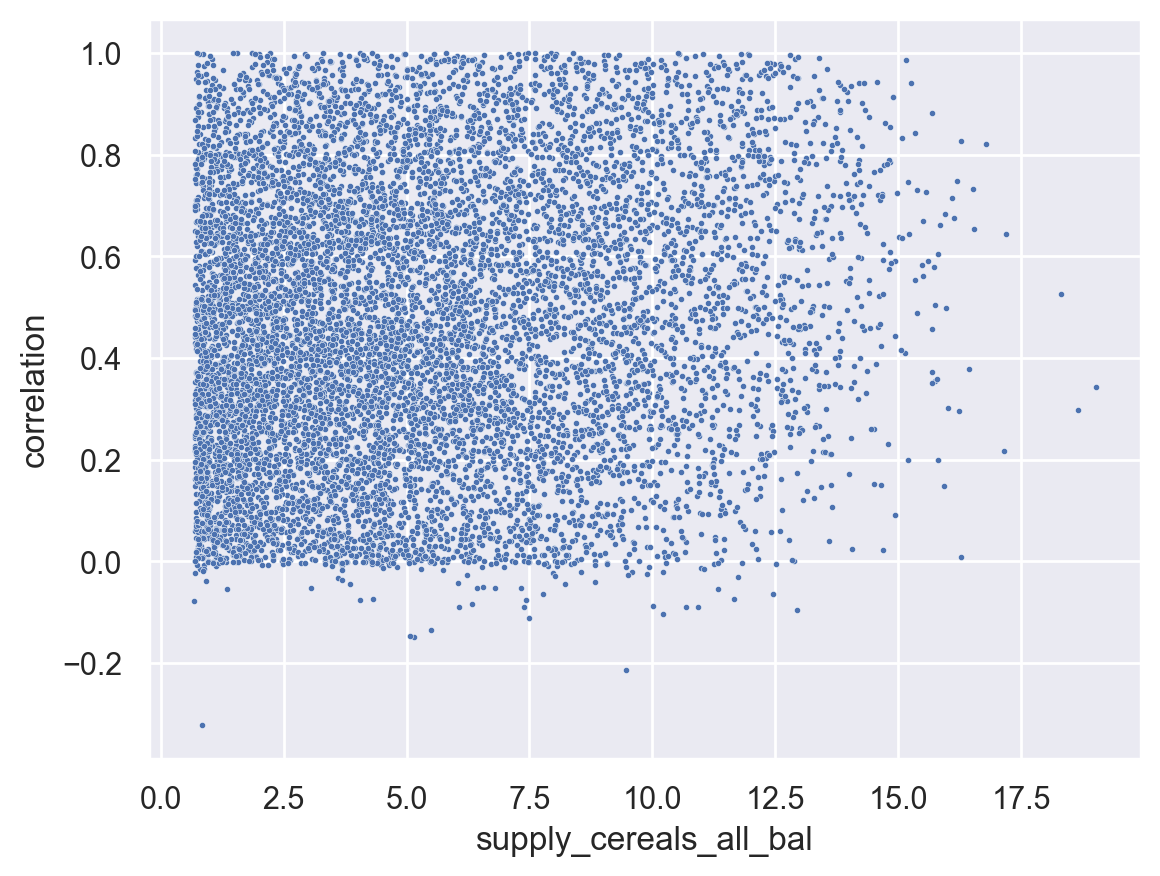

In [50]:
df = df_F_fao.groupby(['from_iso3', 'to_iso3'])[[
    f'supply_{crop}_bal', f'supply_{crop}_pred']].corr().iloc[0::2][[f'supply_{crop}_pred']].reset_index().drop('level_2', axis=1).rename(
    columns={f'supply_{crop}_pred': 'correlation'})
df = df.merge(df_F_fao.groupby(['from_iso3', 'to_iso3']).sum()[[f'supply_{crop}_bal']].reset_index())

sns.scatterplot(x=np.log(df[f'supply_{crop}_bal']+1), y=df['correlation'], s=5)

<Axes: >

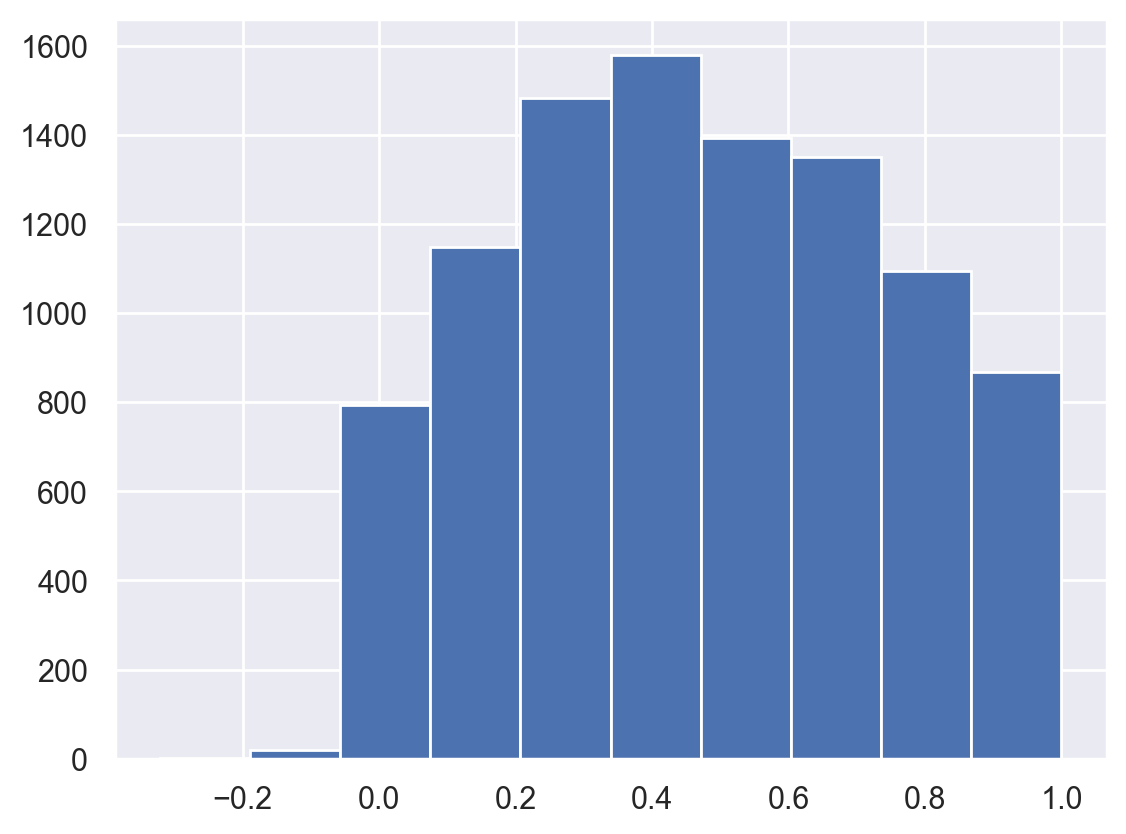

In [51]:
df['correlation'].hist(bins=10)

In [52]:
d = df_F_fao[(df_F_fao['from_iso3']=='IND') & (df_F_fao['to_iso3']=='IND')]
d.loc[d['from_id']=='IND.32_1', 'from_ID'] = 'IND.2_1'
d.loc[d['to_id']=='IND.32_1', 'to_ID'] = 'IND.2_1'
d = d[d['from_id']!=d['to_id']]
d = d.merge(df_india[['from_id', 'to_id', f'supply_{crop}']])

print(accuracy_score(d[f'supply_{crop}_bal']>0, d[f'supply_{crop}']>0))
print(precision_score(d[f'supply_{crop}_bal']>0, d[f'supply_{crop}']>0))
print(recall_score(d[f'supply_{crop}_bal']>0, d[f'supply_{crop}']>0))

print(d[f'supply_{crop}_bal'].corr(d[f'supply_{crop}']))
print(r2_score(d[f'supply_{crop}'], d[f'supply_{crop}_bal']))
print(r2_score(np.log(d[f'supply_{crop}']+1), np.log(d[f'supply_{crop}_bal']+1)))

0.653781512605042
0.6862483311081442
0.743849493487699
0.42739006190720613
-0.22546579017642543
-0.06862890483377937


/var/folders/w4/vjtm9mrs2411x50mjmg78b7r0000gn/T/ipykernel_79637/998878306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.loc[d['from_id']=='IND.32_1', 'from_ID'] = 'IND.2_1'
/var/folders/w4/vjtm9mrs2411x50mjmg78b7r0000gn/T/ipykernel_79637/998878306.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d.loc[d['to_id']=='IND.32_1', 'to_ID'] = 'IND.2_1'


In [53]:
d1 = df_F_fao[(df_F_fao['from_iso3']=='USA') & (df_F_fao['to_iso3']=='CHN')]
d2 = df_F_fao[(df_F_fao['from_iso3']=='CHN') & (df_F_fao['to_iso3']=='USA')]

d1 = d1.merge(df_us_china[['from_id', 'to_id', f'supply_{crop}']])
d2 = d2.merge(df_us_china[['from_id', 'to_id', f'supply_{crop}']])
d = pd.concat([d1, d2], axis=0, ignore_index=False)

print(accuracy_score(d[f'supply_{crop}_bal']>0, d[f'supply_{crop}']>0))
print(precision_score(d[f'supply_{crop}_bal']>0, d[f'supply_{crop}']>0))
print(recall_score(d[f'supply_{crop}_bal']>0, d[f'supply_{crop}']>0))

print(d[f'supply_{crop}_bal'].corr(d[f'supply_{crop}']))
print(r2_score(d[f'supply_{crop}'], d[f'supply_{crop}_bal']))
print(r2_score(d[f'supply_{crop}']/d[f'supply_{crop}'].sum(), d[f'supply_{crop}_bal']/d[f'supply_{crop}_bal'].sum()))
print(r2_score(np.log(d[f'supply_{crop}']+1), np.log(d[f'supply_{crop}_bal']+1)))

0.624920936116382
0.5030769230769231
0.2747899159663866
0.0791878549132861
-6.535565432074973
-2.425188543113674
-0.3787827556016614


In [54]:
df_F_fao[(df_F_fao['from_iso3']==df_F_fao['to_iso3'])][f'supply_{crop}_bal'].sum()

707280140.7659984

In [55]:
df_F_fao[(df_F_fao['from_iso3']!=df_F_fao['to_iso3'])][f'supply_{crop}_bal'].sum()

455378609.2898545

In [56]:
df_F_fao[(df_F_fao['from_iso3']==df_F_fao['to_iso3']) & (df_F_fao['from_iso3']=='IND')][f'supply_{crop}_bal'].sum()

88970112.31052616

In [57]:
df_F_fao[(df_F_fao['from_iso3']==df_F_fao['to_iso3']) & (df_F_fao['from_iso3']=='CHN')][f'supply_{crop}_bal'].sum()

127283676.26885644

In [58]:
df_F_fao[(df_F_fao['from_iso3']==df_F_fao['to_iso3']) & (df_F_fao['from_iso3']=='USA')][f'supply_{crop}_bal'].sum()

180493955.72997358

In [59]:
df_F_fao[(df_F_fao['from_iso3']==df_F_fao['to_iso3']) & (df_F_fao['from_iso3']=='BRA')][f'supply_{crop}_bal'].sum()

29100342.72010503

In [60]:
df_F.sort_values(by=['from_id', 'to_id'])['supply_cereals_all_bal'].corr(
    df_F_fao.sort_values(by=['from_id', 'to_id'])['supply_cereals_all_bal']
)

0.673582437676676

In [61]:
print(r2_score(df_F.sort_values(by=['from_id', 'to_id'])['supply_cereals_all_bal'],
               df_F_fao.sort_values(by=['from_id', 'to_id'])['supply_cereals_all_bal']))
print(r2_score(np.log(df_F.sort_values(by=['from_id', 'to_id'])['supply_cereals_all_bal']+1),
               np.log(df_F_fao.sort_values(by=['from_id', 'to_id'])['supply_cereals_all_bal']+1)))

0.2405915157647971
0.37181553440820936


### sensitivity analysis based on different harmonization parameters

In [7]:
df_list = []
for i in range(96):
    df = pd.read_parquet(f'../../data/machine_learning/admin_predictions_harmonized/sensitivity_analysis/df_mat_bal_{crop}_{suffix}_{i}.parquet.gzip')
    df = df.rename(columns={f'supply_{crop}_bal': f'supply_{crop}_bal_{i}'})
    df_list.append(df)

In [8]:
df = df_list[0]
for i in range(1,96):
    df = df.merge(df_list[i])

In [9]:
corr = df[[col for col in df.columns if f'supply_{crop}' in col]].corr()

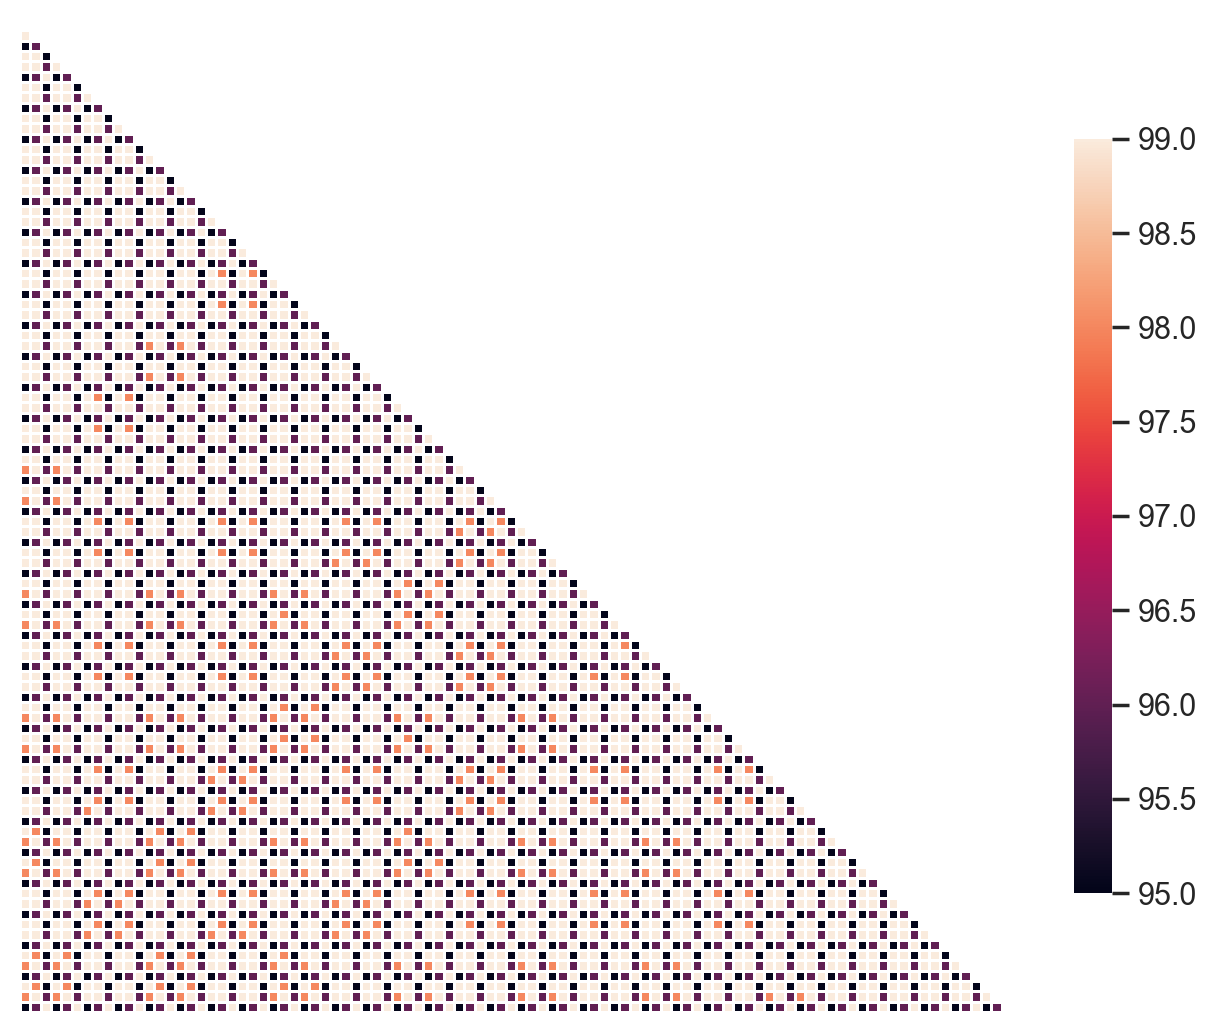

In [10]:
sns.set_theme(style="white")

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 7))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap((corr * 100).astype(int), mask=mask,  
            # center=90, vmin=80,
            square=True, linewidths=.5, 
            cbar_kws={"shrink": .7}
           )

plt.tick_params(
    axis='both',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False,
    left=False,      
    right=False,         
    labelleft=False) 

plt.savefig('../../Trade networks paper/figures/sensitivity_analysis.jpg', bbox_inches='tight', dpi=300)
plt.show()

In [17]:
df['mean'] = df[[col for col in df.columns if f'supply_{crop}' in col]].mean(axis=1)
df['sd'] = df[[col for col in df.columns if f'supply_{crop}' in col]].std(axis=1)
df['se'] = df[[col for col in df.columns if f'supply_{crop}' in col]].sem(axis=1)

df['sd_rel'] = df['sd'] / (df['mean']+1)
df['se_rel'] = df['se'] / (df['mean']+1)

In [18]:
df[['mean', 'sd', 'sd_rel', 'se', 'se_rel']].describe()

,mean,sd,sd_rel,se,se_rel
count,1.250330e+07,1.250330e+07,1.250330e+07,1.250330e+07,1.250330e+07
mean,9.534450e+01,1.192844e+01,1.566251e-02,1.217441e+00,1.598548e-03
std,6.695124e+03,9.651222e+02,1.121260e-01,9.850237e+01,1.144381e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.368426e+06,2.139017e+06,9.674833e+00,2.183125e+05,9.874335e-01


In [22]:
df[(df['sd_rel']>0.5) & (df['mean']>10000)]['mean'].describe()

count    1.369000e+03
mean     3.558333e+04
std      9.742952e+04
min      1.001953e+04
25%      1.306137e+04
50%      1.821182e+04
75%      3.200669e+04
max      3.008956e+06
Name: mean, dtype: float64

In [23]:
df[df['mean']>10000].shape

(14287, 105)

In [26]:
len(df[(df['sd_rel']>0.5) & (df['mean']>10000)])/len(df[df['mean']>10000])

0.09582137607615315

In [16]:
df[[col for col in df.columns if f'supply_{crop}' in col]].sum()

supply_cereals_all_bal_0     1.189056e+09
supply_cereals_all_bal_1     1.183852e+09
supply_cereals_all_bal_2     1.179659e+09
supply_cereals_all_bal_3     1.189712e+09
supply_cereals_all_bal_4     1.184431e+09
supply_cereals_all_bal_5     1.180458e+09
supply_cereals_all_bal_6     1.189506e+09
supply_cereals_all_bal_7     1.184156e+09
supply_cereals_all_bal_8     1.180938e+09
supply_cereals_all_bal_9     1.190178e+09
supply_cereals_all_bal_10    1.184818e+09
supply_cereals_all_bal_11    1.181825e+09
supply_cereals_all_bal_12    1.188173e+09
supply_cereals_all_bal_13    1.182914e+09
supply_cereals_all_bal_14    1.178405e+09
supply_cereals_all_bal_15    1.188866e+09
supply_cereals_all_bal_16    1.183541e+09
supply_cereals_all_bal_17    1.179274e+09
supply_cereals_all_bal_18    1.188470e+09
supply_cereals_all_bal_19    1.183119e+09
supply_cereals_all_bal_20    1.179584e+09
supply_cereals_all_bal_21    1.189192e+09
supply_cereals_all_bal_22    1.183819e+09
supply_cereals_all_bal_23    1.180